In [44]:
import pandas as pd
from datetime import datetime
import torch
from transformers import BertTokenizer, BertModel
import matplotlib.pyplot as plt
import gc
from tqdm import tqdm
import numpy as np
import os
import re
import plotly.graph_objects as go

In [10]:
plt.style.use('default')

plt.rcParams.update({
    'font.size': 20,
    'axes.linewidth': 2,
    'axes.titlesize': 20,
    'axes.edgecolor': 'black',
    'axes.labelsize': 18,
    'axes.grid': True,
    'lines.linewidth': 1.5,
    'lines.markersize': 6,
    'figure.figsize': (20, 8),
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'font.family': 'Times New Roman',
    'legend.fontsize': 13,
    'legend.framealpha': 0.8,
    'legend.edgecolor': 'black',
    'legend.shadow': False,
    'legend.fancybox': True,
    'legend.frameon': True,
})

In [11]:
file_path = '../Datasets/Processed/ETL/Twi20_tweets.parquet'

df_tweets = pd.read_parquet(file_path)

In [12]:
file_path_2 = '../Datasets/Processed/ETL/ETL2_Twi20_profile.parquet'
df_profile = pd.read_parquet(file_path_2)

In [13]:
df_tweets

,tweet,ID
0,RT @CarnivalCruise: 🎉 Are you ready to see wha...,17461978
1,Who has time for receipts? Not me. @epson rece...,17461978
2,Steady wants to encourage you to invest in you...,17461978
3,"Good one, @rishid. But let’s see if y'all can ...",17461978
4,#lsunationalchamps\n,17461978
...,...,...
1598323,"Man, the 70s was a bad-looking decade. Take th...",3385331674
1598324,RT @RobinsonCano: The RC22 DREAM School is sta...,3385331674
1598325,RT @JonHeymanCBS: this is last season for @Don...,3385331674
1598326,RT @whitesox: #SoxSurprise! @BoJackson takes o...,3385331674


In [14]:
df_tweets['ID'] = df_tweets['ID'].astype(str)

In [15]:
df_tweets.dtypes

tweet    object
ID       object
dtype: object

In [16]:
df_profile

,ID,name,screen_name,location,description,protected,followers_count,friends_count,listed_count,favourites_count,...,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,default_profile,default_profile_image,domain,label,tweets_count,account_age_days,account_age_years
0,17461978,SHAQ,SHAQ,"Orlando, FL","VERY QUOTATIOUS, I PERFORM RANDOM ACTS OF SHAQ...",False,15349596,692,45568,142,...,252429,666666,True,False,False,"Politics, Business, Entertainment",0,200.0,5474,14.997260
1,1297437077403885568,Jennifer Fishpaw,JenniferFishpaw,None,,False,0,44,0,7,...,DDEEF6,333333,True,True,False,Politics,1,1.0,1178,3.227397
2,17685258,Brad Parscale,parscale,Florida,Owner @ Parscale Strategy. Senior Advisor Digi...,False,762839,475,3201,953,...,FFFFFF,666666,False,False,False,"Politics, Entertainment, Sports",0,200.0,5464,14.969863
3,15750898,FOX 13 Tampa Bay,FOX13News,"Tampa, FL",Bringing you the important stuff like breaking...,False,327587,4801,1744,2946,...,E8EEF0,333333,True,False,False,Politics,0,200.0,5577,15.279452
4,1659167666,Vonte The Plug 🎤🔌,VonteThePlugNC,"Jacksonville Beach, FL",MOTIVATION 3 OUT NOW 🔥 Singles: ‘Lil Shawdy’ &...,False,13324,647,44,729,...,DDEEF6,333333,True,True,False,Politics,1,88.0,3748,10.268493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9456,452754350,Alan Reifman,AlanReifman,"Lubbock, Texas",Texas Tech professor of human devt and family ...,False,7760,8104,106,75,...,DDEEF6,333333,True,False,False,Sports,1,200.0,4334,11.873973
9457,850435801687183362,Junk Wax Investment Services ($19.99 Per Month),CardsFromAttic,JunkWaxSylvania,Satirizing the sports card industry one tweet ...,False,8446,408,55,125825,...,DDEEF6,333333,True,True,False,Sports,1,0.0,2411,6.605479
9458,2188795745,B,bkgreen09,United States,,False,309,1961,3,1572,...,000000,000000,False,False,False,Sports,1,200.0,3645,9.986301
9459,940687680,bilal koç,bilalko14,None,,False,154,1019,0,627,...,DDEEF6,333333,True,True,False,Sports,1,145.0,4020,11.013699


### Removing tweets from users who are not in *df_profile*

In [17]:
mask = df_tweets['tweet'].isnull()

count_nulls_per_row = mask.sum()
count_nulls_per_row

65

In [18]:
df_tweets_filtered = df_tweets.dropna(subset=['tweet'])

In [19]:
df_tweets_filtered = pd.merge(df_profile[['ID']], df_tweets_filtered, on='ID', how='inner')

In [20]:
df_tweets_filtered

,ID,tweet
0,17461978,RT @CarnivalCruise: 🎉 Are you ready to see wha...
1,17461978,Who has time for receipts? Not me. @epson rece...
2,17461978,Steady wants to encourage you to invest in you...
3,17461978,"Good one, @rishid. But let’s see if y'all can ..."
4,17461978,#lsunationalchamps\n
...,...,...
1443561,3385331674,"Man, the 70s was a bad-looking decade. Take th..."
1443562,3385331674,RT @RobinsonCano: The RC22 DREAM School is sta...
1443563,3385331674,RT @JonHeymanCBS: this is last season for @Don...
1443564,3385331674,RT @whitesox: #SoxSurprise! @BoJackson takes o...


### Checking if there are users in *df_profile* who do not have any tweets

In [21]:
# Check which IDs from df_profile are not in df_tweets
ids_not_in_tweets = df_profile[~df_profile['ID'].isin(df_tweets['ID'])]

# Display the IDs that do not have corresponding tweets
len(ids_not_in_tweets)

1202

### Creating a column that counts the number of tweets per user

In [37]:
# Contar o número de tweets por ID de usuário
tweets_count = df_tweets.groupby('ID').size().reset_index(name='tweets_count')

# Fazer um merge com o DataFrame df_profile para associar a contagem de tweets com cada perfil
df_profile = pd.merge(df_profile, tweets_count, on='ID', how='left')

# Preencher NaNs com 0 para usuários sem tweets
df_profile['tweets_count'].fillna(0, inplace=True)

In [28]:
df_profile['created_at'] = pd.to_datetime(df_profile['created_at'])

df_profile['created_at'] = df_profile['created_at'].dt.tz_localize(None)

df_profile['account_age_days'] = (datetime.now() - df_profile['created_at']).dt.days

df_profile['account_age_years'] = df_profile['account_age_days'] / 365

print(df_profile[['created_at', 'account_age_days', 'account_age_years']])

              created_at  account_age_days  account_age_years
0    2008-11-18 10:27:25              5657          15.498630
1    2020-08-23 07:35:11              1361           3.728767
2    2008-11-27 18:47:32              5648          15.473973
3    2008-08-06 15:12:10              5761          15.783562
4    2013-08-10 03:25:35              3931          10.769863
...                  ...               ...                ...
9456 2012-01-02 06:17:32              4517          12.375342
9457 2017-04-07 19:51:10              2595           7.109589
9458 2013-11-20 12:36:56              3829          10.490411
9459 2012-11-11 06:42:25              4203          11.515068
9460 2015-07-21 01:46:13              3221           8.824658

[9461 rows x 3 columns]


## Check number of tweets by user

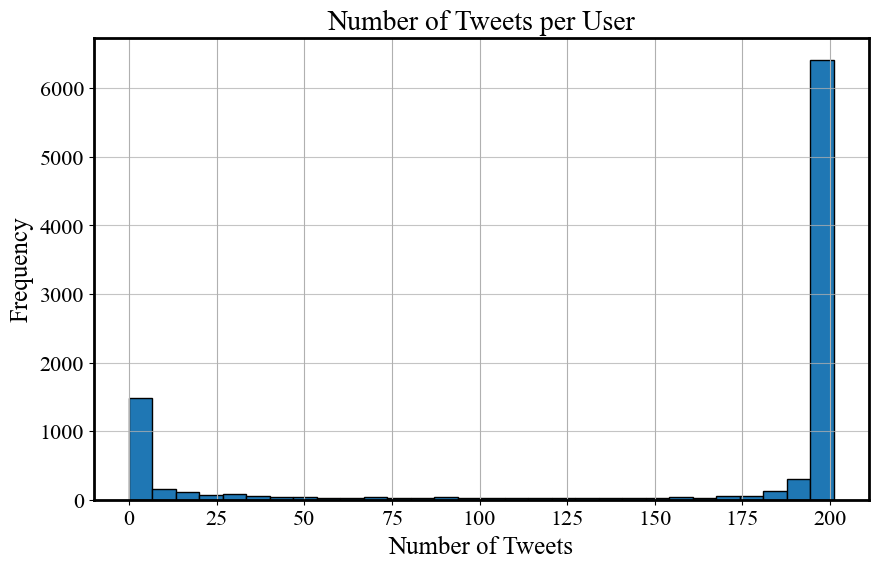

In [39]:
# Create a histogram with Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df_profile['tweets_count'], bins=30, edgecolor='black')

# Configure the layout of the chart
plt.title('Number of Tweets per User')
plt.xlabel('Number of Tweets')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Show the chart
plt.show()

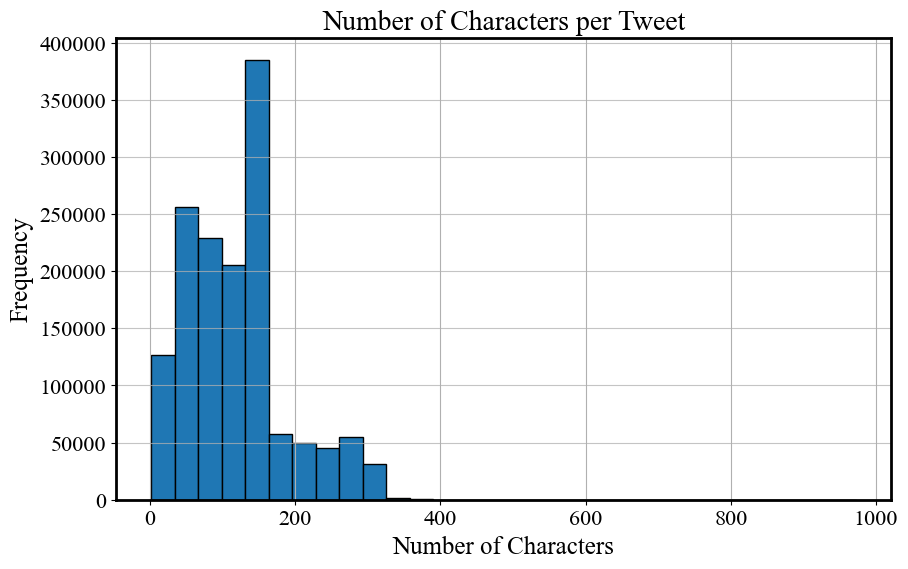

In [40]:
# Calculate the length of each tweet
df_tweets_filtered['tweet_length'] = df_tweets_filtered['tweet'].apply(len)

# Create a histogram with Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df_tweets_filtered['tweet_length'], bins=30, edgecolor='black')

# Configure the layout of the chart
plt.title('Number of Characters per Tweet')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Show the chart
plt.show()

In [41]:
# Find the index of the longest tweet
longest_tweet_idx = df_tweets_filtered['tweet_length'].idxmax()

# Get the text of the longest tweet
longest_tweet_text = df_tweets_filtered.loc[longest_tweet_idx, 'tweet']

# Display the index and the text of the longest tweet
print("Index of the Longest Tweet:", longest_tweet_idx)
print("Text of the Longest Tweet:", longest_tweet_text)

Index of the Longest Tweet: 716183
Text of the Longest Tweet: @calijeff1 @TrumpSugar @SpaceForceBravo @lmpeachThePAB @ilovecardinals4 @miss_simone247 @phil_mckraken @JimHaf @tomag49 @OregonDarryl @BrooklynPrivat1 @jones7955 @LSweetApps @misshellca @PwrCane1 @ThereseOSulliv2 @terryloohoo @SeanTDel @donnnie @zaharias19 @GOPkleptocrat @Pittstock @CRKittle @Youarenumbee6 @WeSeeYouWeKnow @Goathead19 @FWLVIEWS @DectiveSamSpade @SofaKingBueno @pursuitofMAGA @2tall2fall4it @TiredOf_UrCrap2 @gorillastyle @Sixlets821 @LynnesCommunity @KatGkannon @camp_terrence @firefighter_tom @saveusain2020 @DanFoc77 @AnnMarieCopla10 @HouseOfJames2 @robert_sicario @LeonWhi63670221 @Killerdogz1 @LindaLeePeacock @TrumpleDump @raggapegs @RedRaccoon Well, the case is closed as long as he stays in office, yet the taxpayer's grand jury info can still be used in impeachment proceedings as necessary.

You understand what Mueller testified to, right?

(Respectfully, NOT as much a meme as a verbatim quote of testimony un

These character counts are very high because they consider the @ even in "conversations". For this, the function remove_users_with_mentions was created:

The function remove_users_with_mentions receives a tweet text as input.

1. First, the function uses the regular expression re.findall(r'@\w+', text) to find all user mentions in the tweet text. This searches for words that start with "@" followed by letters, numbers, or underscores.

2. Next, the function checks if the number of mentions found (represented by the length of the mentions list) is greater than or equal to X. This determines if there are X or more consecutive mentions in the tweet.

3. If there are X or more consecutive mentions, the function enters the if condition and removes all mentions using the regular expression re.sub(r'@\w+\s*', '', text). This replaces all mentions (along with possible whitespace after each mention) with an empty string, leaving only the remaining tweet text.

4. If there are not X or more consecutive mentions, the function enters the else condition and simply returns the original tweet text without making modifications.

In the end, the function returns the tweet text, which can be updated in the DataFrame with the mentions removed according to the specified criterion. This allows you to keep the tweet text while removing the mentions when there is a large number of them in sequence.

In [42]:
# Function to remove mentioned users in tweets with more than 5 consecutive mentions
def remove_users_with_mentions(text, num_mentions_to_remove=5):
    # Find all user mentions in the text
    mentions = re.findall(r'@\w+', text)

    # Check if there are X or more consecutive mentions
    if len(mentions) > num_mentions_to_remove:
        # Remove all mentions and keep the remaining text
        cleaned_text = re.sub(r'@\w+\s*', '', text)
    else:
        # Keep the original text
        cleaned_text = text

    return cleaned_text

In [45]:
df_tweets_filtered['tweet'] = df_tweets_filtered['tweet'].apply(remove_users_with_mentions, num_mentions_to_remove=1)

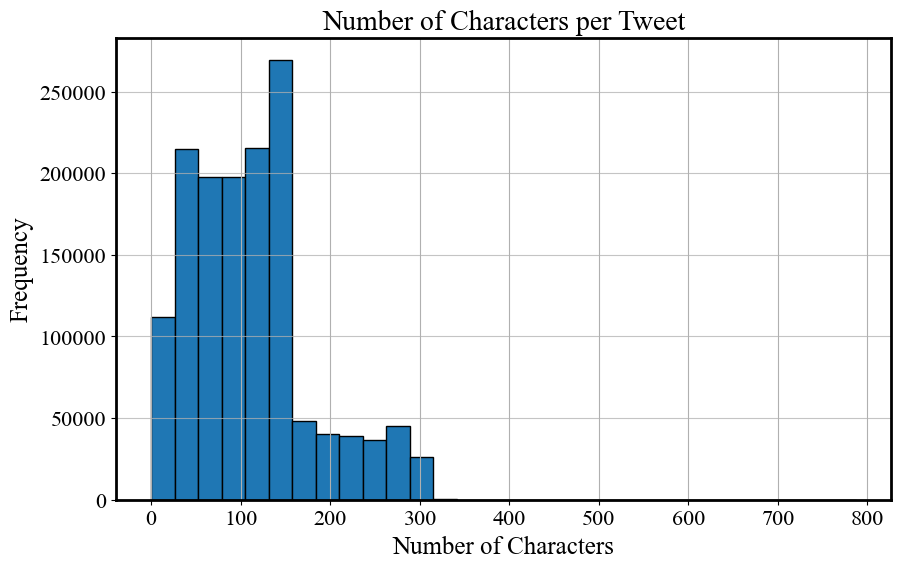

In [46]:
# Calculate the length of each tweet
df_tweets_filtered['tweet_length'] = df_tweets_filtered['tweet'].apply(len)

# Create a histogram with Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df_tweets_filtered['tweet_length'], bins=30, edgecolor='black')

# Configure the layout of the chart
plt.title('Number of Characters per Tweet')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Show the chart
plt.show()

In [47]:
# Function to check if the tweet has more than 280 characters
def tweet_has_more_than_280_chars(tweet):
    return len(tweet) > 280

# Apply the function to create a boolean column indicating if the tweet has more than 280 characters
df_tweets_filtered['tweet_has_more_than_280_chars'] = df_tweets_filtered['tweet'].apply(tweet_has_more_than_280_chars)

# Select tweets with more than 280 characters
tweets_with_more_than_280_chars = df_tweets_filtered[df_tweets_filtered['tweet_has_more_than_280_chars']]

In [49]:
tweets_with_more_than_280_chars.sort_values(by='tweet', key=lambda x: x.str.len(), ascending=False).head(10)

,ID,tweet,tweet_length,tweet_has_more_than_280_chars
996134,282255934,Zodiac&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;...,787,True
597028,904864244830806016,🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦...,725,True
833674,2892918498,Our #Gorilla Calls Update:\n\nNOW KEEp BOOKING...,395,True
999003,342964940,🏴󠁧󠁢󠁳󠁣󠁴󠁿🏴󠁧󠁢󠁳󠁣󠁴󠁿🏴󠁧󠁢󠁳󠁣󠁴󠁿🏴󠁧󠁢󠁳󠁣󠁴󠁿🏴󠁧󠁢󠁳󠁣󠁴󠁿🏴󠁧󠁢󠁳󠁣󠁴󠁿🏴󠁧󠁢󠁳...,363,True
627829,826801526,"“Though they are hopeless and heartless, the @...",341,True
1382509,412682869,Tonight’s episode of @greggutfeld brought to y...,341,True
141761,778341409313042432,Another terrific plot\n\nEasy to make misleadi...,341,True
262802,807003567605227520,"If you haven’t read Chanel Miller’s book, KNOW...",341,True
1397999,1339488762,"@SecPompeo is right: ""China is working to take...",340,True
1397942,1339488762,Now the #Indian &amp; #Russian navies will hol...,339,True


# 1. Load the BERT Model and Tokenizer

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# 2. Tokenize and Encode the texts

In [56]:
# Find the longest tweet index
longest_tweet_idx = df_tweets_filtered['tweet_length'].idxmax()

# Get the longest tweet
longest_tweet_text = df_tweets_filtered.loc[longest_tweet_idx, 'tweet']

# Display the index and the text of the longest tweet
print("Index of the Longest Tweet:", longest_tweet_idx)
print("Text of the Longest Tweet:", longest_tweet_text)

Index of the Longest Tweet: 996134
Text of the Longest Tweet: Zodiac&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;



# 2. Tokenize and Encode the texts

In [ ]:
# This tweet is very strange and the longest of all, so I will remove it
index_to_remove = 996134
df_tweets_filtered = df_tweets_filtered.drop(index_to_remove)

In [ ]:
tweets_with_more_than_280_chars.sort_values(by='tweet', key=lambda x: x.str.len(), ascending=False).head(10)

,ID,tweet,tweet_lenght,tweet_has_more_than_280_chars
996134,282255934,Zodiac&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;...,787,True
597028,904864244830806016,🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦🏻‍♂️🤦...,725,True
833674,2892918498,Our #Gorilla Calls Update:\n\nNOW KEEp BOOKING...,395,True
999003,342964940,🏴󠁧󠁢󠁳󠁣󠁴󠁿🏴󠁧󠁢󠁳󠁣󠁴󠁿🏴󠁧󠁢󠁳󠁣󠁴󠁿🏴󠁧󠁢󠁳󠁣󠁴󠁿🏴󠁧󠁢󠁳󠁣󠁴󠁿🏴󠁧󠁢󠁳󠁣󠁴󠁿🏴󠁧󠁢󠁳...,363,True
627829,826801526,"“Though they are hopeless and heartless, the @...",341,True
1382509,412682869,Tonight’s episode of @greggutfeld brought to y...,341,True
141761,778341409313042432,Another terrific plot\n\nEasy to make misleadi...,341,True
262802,807003567605227520,"If you haven’t read Chanel Miller’s book, KNOW...",341,True
1397999,1339488762,"@SecPompeo is right: ""China is working to take...",340,True
1397942,1339488762,Now the #Indian &amp; #Russian navies will hol...,339,True


In [ ]:
df_tweets_filtered

,ID,tweet,tweet_lenght,tweet_has_more_than_280_chars
0,17461978,RT @CarnivalCruise: 🎉 Are you ready to see wha...,141,False
1,17461978,Who has time for receipts? Not me. @epson rece...,159,False
2,17461978,Steady wants to encourage you to invest in you...,305,True
3,17461978,"Good one, @rishid. But let’s see if y'all can ...",168,False
4,17461978,#lsunationalchamps\n,19,False
...,...,...,...,...
1443561,3385331674,"Man, the 70s was a bad-looking decade. Take th...",137,False
1443562,3385331674,RT @RobinsonCano: The RC22 DREAM School is sta...,119,False
1443563,3385331674,RT : this is last season for at nesn (via ). b...,105,False
1443564,3385331674,RT : #SoxSurprise! takes over a section at U.S...,121,False


In [ ]:
#df_tweets_filtered.to_parquet('../Datasets/Processsed/BERT_output/ETL2_tweets.parquet')

In [ ]:
# Tokenize a single description from the 'description' column
tokens = tokenizer.encode(df_tweets_filtered['tweet'].iloc[1078634], add_special_tokens=True)

# Count the number of tokens
num_tokens = len(tokens)

# Display the number of tokens
print(num_tokens)

95


# 2, 3, and 4. Tokenize and apply the model in batches to reduce processing time

In [ ]:
# The path to the directory where the Parquet files are being saved
output_directory = '../Datasets/Processed/BERT_output/Tweets_embedding'

# Function to find the last saved file
def find_last_saved_file(directory):
    files = [f for f in os.listdir(directory) if f.endswith('.parquet')]
    if not files:
        return -1  # If no files, start from the beginning
    last_file = max(files, key=lambda x: int(x.rsplit('_', 1)[-1].split('.')[0]))
    last_index = int(last_file.rsplit('_', 1)[-1].split('.')[0])
    return last_index

In [ ]:
# Adjust the function to start from the last saved index
def process_data_in_batches(dataframe, column_name, batch_size=16):
    model.eval()
    last_saved_index = find_last_saved_file(output_directory)
    print(f'Last saved index: {last_saved_index}')

    # Calculate the initial index from the last saved batch
    initial_start_index = (last_saved_index + 1) * batch_size

    for start_index in tqdm(range(initial_start_index, len(dataframe), batch_size), initial=last_saved_index + 1, total=len(dataframe)//batch_size, desc="Processing batches"):
        end_index = start_index + batch_size
        batch = dataframe.iloc[start_index:end_index]

        inputs = tokenizer(batch[column_name].tolist(), padding=True, truncation=True, return_tensors="pt", max_length=100)

        with torch.no_grad():
            outputs = model(**inputs)

        cls_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()

        # Convert to DataFrame and save as Parquet file
        df_embeddings = pd.DataFrame(cls_embeddings)
        df_embeddings.columns = df_embeddings.columns.astype(str)
        df_embeddings.to_parquet(f'{output_directory}/embeddings_batch_{start_index//batch_size}.parquet')

        # Clear memory
        gc.collect()


In [ ]:
process_data_in_batches(df_tweets_filtered, 'tweet', batch_size=512)

Last saved index: 2709


Processing batches: 2820it [1:27:26, 47.69s/it]


In [ ]:
#df_profile.to_parquet(file_path_2)

# 5. Averaging the embeddings of each user's tweets
- This results in a single embedding that captures the central information of all the user's tweets.

In [ ]:
parquet_directory = '../Datasets/Processed/BERT_output/Tweets_embedding'
num_batches = len([name for name in os.listdir(parquet_directory) if name.endswith('.parquet')])
num_batches

2820

In [ ]:
# Initialize a dictionary to store cumulative sums and counts of embeddings per user
embedding_sums = {}
counts = {}
batch_size = 512

output_directory = '../Datasets/Processed/BERT_output/Tweets_embedding'

# Loop through all Parquet files
for batch_num in tqdm(range(num_batches), desc="Reading batches"):
    # Load the batch of embeddings from the Parquet file
    batch_embeddings = pd.read_parquet(f'{output_directory}/embeddings_batch_{batch_num}.parquet')

    # Determine the start and end indices for this batch within the 'df_tweets' DataFrame
    start_index = batch_num * batch_size
    # The end_index is the smaller of the next batch start or the total length of the DataFrame
    end_index = min((batch_num + 1) * batch_size, len(df_tweets))
    batch_user_ids = df_tweets_filtered['ID'].iloc[start_index:end_index]

    # Iterate over each pair of user_id and embedding
    for user_id, embedding in zip(batch_user_ids, batch_embeddings.values):
        # Update the cumulative sum and count for each user_id
        if user_id in embedding_sums:
            embedding_sums[user_id] += embedding
            counts[user_id] += 1
        else:
            embedding_sums[user_id] = embedding
            counts[user_id] = 1

# Calculate the average embeddings for each user
user_embeddings = {user_id: embedding_sums[user_id] / counts[user_id] for user_id in embedding_sums}

# Convert the dictionary to a pandas DataFrame
user_embeddings_df = pd.DataFrame.from_dict(user_embeddings, orient='index')

Reading batches: 100%|██████████| 2820/2820 [1:23:57<00:00,  1.79s/it]


In [ ]:
user_embeddings_df.columns = user_embeddings_df.columns.astype(str)
user_embeddings_df = user_embeddings_df.reset_index().rename(columns={'index': 'ID'})

In [ ]:
user_embeddings_df.to_parquet(f'/../Datasets/Processed/BERT_output/Tweets_mean_embedding.parquet')

In [ ]:
df_tweets_filtered['ID'].unique()

array(['17461978', '17685258', '15750898', ..., '2188795745', '940687680',
       '3385331674'], dtype=object)

In [ ]:
user_embeddings_df

,ID,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
0,17461978,0.023283,-0.149296,0.164000,-0.125189,-0.339025,-0.443043,0.373786,0.585626,0.025721,...,-0.046002,-0.227582,0.010767,-0.279515,0.279511,0.079038,-0.245556,-0.254086,0.219315,0.331046
1,17685258,-0.019242,-0.123497,0.063158,-0.079977,-0.337139,-0.383380,0.314490,0.444161,0.014693,...,-0.015297,-0.061754,-0.064307,-0.253225,0.239730,0.103078,-0.140334,-0.360729,0.328983,0.485897
2,15750898,-0.077809,-0.285630,0.109521,-0.176323,-0.182821,-0.391873,0.311805,0.485124,-0.047823,...,0.000320,-0.094938,-0.148811,-0.269341,0.233462,0.085402,-0.211024,-0.260182,0.307783,0.443683
3,1659167666,0.074887,-0.006194,0.015314,-0.138813,-0.379534,-0.259122,0.414421,0.535420,-0.025732,...,0.041236,-0.200378,-0.031523,-0.167846,0.293275,0.108538,-0.134847,-0.302449,0.211363,0.360968
4,34743251,-0.369285,-0.219031,0.153733,-0.175386,-0.143214,-0.265508,0.214450,0.470575,0.017117,...,0.069832,-0.108825,0.046234,-0.269846,0.304923,-0.086508,-0.165468,-0.116252,0.345918,0.411085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8217,716743449,-0.038359,-0.210163,0.037034,-0.121322,-0.123791,-0.325420,0.246603,0.455182,-0.042024,...,0.002347,-0.116113,-0.064121,-0.243389,0.194481,0.065916,-0.216586,-0.239344,0.295054,0.436101
8218,452754350,-0.183755,-0.278013,-0.004497,-0.174776,-0.293556,-0.369296,0.257001,0.487378,-0.027451,...,0.030504,-0.044747,-0.043325,-0.278767,0.206637,0.062205,-0.346301,-0.156720,0.328928,0.407831
8219,2188795745,-0.032042,-0.081250,0.064577,-0.101587,-0.349365,-0.333254,0.352729,0.504198,-0.027824,...,0.028375,-0.125226,0.078861,-0.198314,0.210478,0.029161,-0.275478,-0.305022,0.249899,0.453064
8220,940687680,-0.004213,-0.021744,0.037065,-0.064863,-0.334678,-0.233090,0.267737,0.430669,0.076033,...,0.067390,-0.085999,-0.045483,-0.239374,0.109760,0.162182,-0.174642,-0.413681,0.293543,0.503990
